# Exploratory Data Analysis

## Overview Of Data Science Problem
The purpose of this data science project is to come up with a pricing model for diamonds in the diamond market. 

Using historical prices of diamonds for a business case, I can use a dataset to understand price and other features related to diamonds and also help others make future predictions in a more reliable way than just using the historical price. There is also a huge absence of knowing what the fair value for a diamond to the public is. In particular, which diamonds we are most likely to pay more for. 

This project aims to build a predictive model for diamond price based on a number of features, or properties of industry standard-type diamonds. This model will be used to provide guidance for diamond pricing and future value investment plans.

#### **Goal**: 

Explore the data relationships of all features and understand how the
features compare to the response variable (target).

* Build data profiles and tables
    * Inferential statistics
    
* Explore data relationships
    * Data visualization
    
* Feature Selection and Engineering

The first question we want to answer is the following:

    *What is the average price of almost 54,000 diamonds?*

## Importing relevant libraries

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style 
sns.set_style('darkgrid')

# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Loading raw data

In [7]:
raw_data = 'Diamond Price Prediction.csv'
data = pd.read_csv(raw_data)

## Preprocessing

In [8]:
# Checking rows and columns of data
print(data.shape)

(53940, 10)


In [9]:
data.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
# Changing misspelled first feature and other features
new_columns = {"Carat(Weight of Daimond)":"weight", 'Cut(Quality)':'quality', 'Color':"color", 'Clarity':"clarity", "Depth":"depth",'Table':'flat surface', "Price(in US dollars)":'price', "X(length)": "length", "Y(width)":"width"}
data = data.rename(columns=new_columns)
data = data.drop("Z(Depth)", axis=1)
print(data.columns)

Index(['weight', 'quality', 'color', 'clarity', 'depth', 'flat surface',
       'price', 'length', 'width'],
      dtype='object')


In [11]:
# What data types are we dealing with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        53940 non-null  float64
 1   quality       53940 non-null  object 
 2   color         53940 non-null  object 
 3   clarity       53940 non-null  object 
 4   depth         53940 non-null  float64
 5   flat surface  53940 non-null  float64
 6   price         53940 non-null  int64  
 7   length        53940 non-null  float64
 8   width         53940 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.7+ MB


## Data cleaning

In [12]:
# Changing dtypes of all features
data['price'] = data['price'].astype('float64')
data['quality'] = data['quality'].astype('category')
data['color'] = data['color'].astype('category')
data['clarity'] = data['clarity'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   weight        53940 non-null  float64 
 1   quality       53940 non-null  category
 2   color         53940 non-null  category
 3   clarity       53940 non-null  category
 4   depth         53940 non-null  float64 
 5   flat surface  53940 non-null  float64 
 6   price         53940 non-null  float64 
 7   length        53940 non-null  float64 
 8   width         53940 non-null  float64 
dtypes: category(3), float64(6)
memory usage: 2.6 MB


## Dealing with missing values

In [13]:
# Check for NAs
data.isnull().sum()

weight          0
quality         0
color           0
clarity         0
depth           0
flat surface    0
price           0
length          0
width           0
dtype: int64

## Determining variables of interest

In [15]:
# Check descriptive statistics of all variables
data.describe(include='all')

,weight,quality,color,clarity,depth,flat surface,price,length,width
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000


In [16]:
price = data.price
price.value_counts().sort_index()

326.0      2
327.0      1
334.0      1
335.0      1
336.0      2
          ..
18803.0    1
18804.0    1
18806.0    1
18818.0    1
18823.0    1
Name: price, Length: 11602, dtype: int64

We can see that the lowest prices start at 326.00 in US dollars with 2 observations of that amount and can raise all the way up to 18823.00 in US dollars with 1 observation at that amount.

In [11]:
price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

We can see here that the description for diamond prices matches the values we looked at prior along with other helpful calculations.

## Exploring PDFs

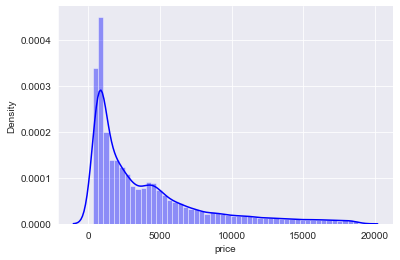

In [22]:
sns.distplot(data.price,
            color='b')

sns.despine()

From the histogram that was plotted, we can see data points are skewed to the right and are of an exponential distribution. This makes sense as diamonds are a luxery item and the more expensive they are the less of them are usually kept on hand. Essentially, the bulk of the group should be toward the cheaper prices as it is cheaper to keep those type of diamonds in bulk.

## Dealing with outliers

In [23]:
q = price.quantile(0.99)
data2 = data[price < q]
data2.describe(include='all')

,weight,quality,color,clarity,depth,flat surface,price,length,width
count,53400.000000,53400,53400,53400,53400.000000,53400.000000,53400.000000,53400.000000,53400.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,21374,11181,12908,NaN,NaN,NaN,NaN,NaN
mean,0.785232,NaN,NaN,NaN,61.751309,57.451927,3789.670019,5.707014,5.710480
std,0.457807,NaN,NaN,NaN,1.430903,2.234943,3745.471684,1.099793,1.121011
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,945.000000,4.710000,4.720000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2372.000000,5.680000,5.700000
75%,1.030000,NaN,NaN,NaN,62.500000,59.000000,5219.000000,6.520000,6.520000


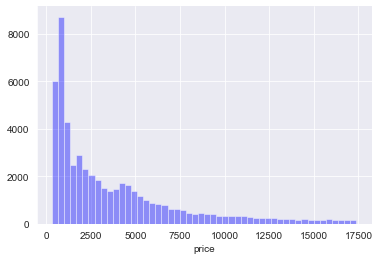

In [27]:
sns.distplot(data2.price,
             kde=False,
             color='b')

sns.despine()

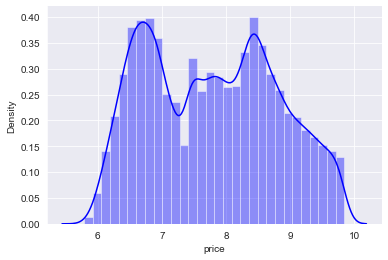

In [31]:
# Transform the distribution using log
sns.distplot(np.log(data.price),
             bins=30,
             color='b')

sns.despine()

After transforming the price feature, it appears the distribution is bimodal due to having two groups of its highest peaks.